## Production Planning

In [8]:
# Import PuLP library
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value

# Initialize the Linear Programming problem
model = LpProblem(name="production-planning", sense=LpMaximize)

# Define decision variables
x1 = LpVariable(name="Product_A", lowBound=0, cat='Continuous')
x2 = LpVariable(name="Product_B", lowBound=0, cat='Continuous')

# Add the objective function to the model
model += 50 * x1 + 40 * x2, "Total_Profit"

# Add constraints to the model
model += (3 * x1 + 3 * x2 <= 100, "Raw_Material_Constraint")
model += (2 * x1 + x2 <= 50, "Labor_Constraint")

# Solve the problem
model.solve()

# Output the results
#print(f"Status: {model.status}, {LpStatus[model.status]}")
print(f"Optimal production of Product A: {x1.varValue} units")
print(f"Optimal production of Product B: {x2.varValue} units")
print(f"Maximum Profit: ${value(model.objective)}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/miniconda3/envs/topics_alg/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/_l/7xr3qhx50rl1tsc0s6dt78hr0000gn/T/0a9a7b88fcaf4d43a205203f40c51034-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/_l/7xr3qhx50rl1tsc0s6dt78hr0000gn/T/0a9a7b88fcaf4d43a205203f40c51034-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 90 (2)
0  Obj -0 Dual inf 90 (2)
2  Obj 1500
Optimal - objective value 1500
Optimal objective 1500 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallcl

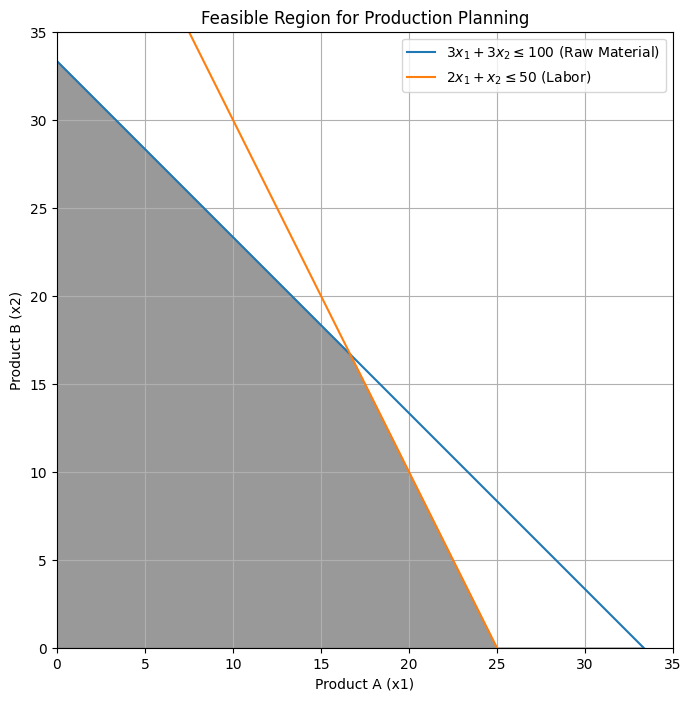

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for Product A (x1) and Product B (x2)
x1 = np.linspace(0, 35, 400)
x2 = np.linspace(0, 35, 400)

# Define the constraints
X1, X2 = np.meshgrid(x1, x2)
constraint1 = 3*X1 + 3*X2 <= 100  # Raw Material Constraint
constraint2 = 2*X1 + X2 <= 50     # Labor Constraint
constraint3 = X1 >= 0             # Non-negativity Constraint for x1
constraint4 = X2 >= 0             # Non-negativity Constraint for x2

# Combine all constraints
feasible_region = constraint1 & constraint2 & constraint3 & constraint4

# Plot the feasible region
plt.figure(figsize=(8, 8))
plt.imshow(feasible_region, extent=(0, 35, 0, 35), origin='lower', cmap='Greys', alpha=0.3)

# Plot each constraint line
plt.plot(x1, (100 - 3*x1)/3, label=r'$3x_1 + 3x_2 \leq 100$ (Raw Material)')
plt.plot(x1, 50 - 2*x1, label=r'$2x_1 + x_2 \leq 50$ (Labor)')

# Highlight the feasible region
plt.fill_between(x1, 0, np.minimum((100 - 3*x1)/3, 50 - 2*x1), where=(x1 <= 33.33), color='gray', alpha=0.5)

# Labels and legend
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.xlabel('Product A (x1)')
plt.ylabel('Product B (x2)')
plt.legend()
plt.title('Feasible Region for Production Planning')
plt.grid(True)
plt.show()

